<a href="https://colab.research.google.com/github/MariamKayinza/MySkin/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = '/content/drive/MyDrive/dataset'

In [ ]:
import pathlib

batch_size = 32
image_size = 256
data_dir="/content/drive/MyDrive/dataset"
data_dir = pathlib.Path(data_dir)

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed=123,
  shuffle=True,
  image_size=(256, 256),
  batch_size=batch_size
  )

Found 2357 files belonging to 9 classes.


In [ ]:
class_names = dataset.class_names
print(len(class_names))
class_names

9


['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[5 8 1 5 7 3 1 1 8 3 7 3 4 4 1 7 5 1 3 4 6 1 3 8 5 3 3 4 1 7 8 0]


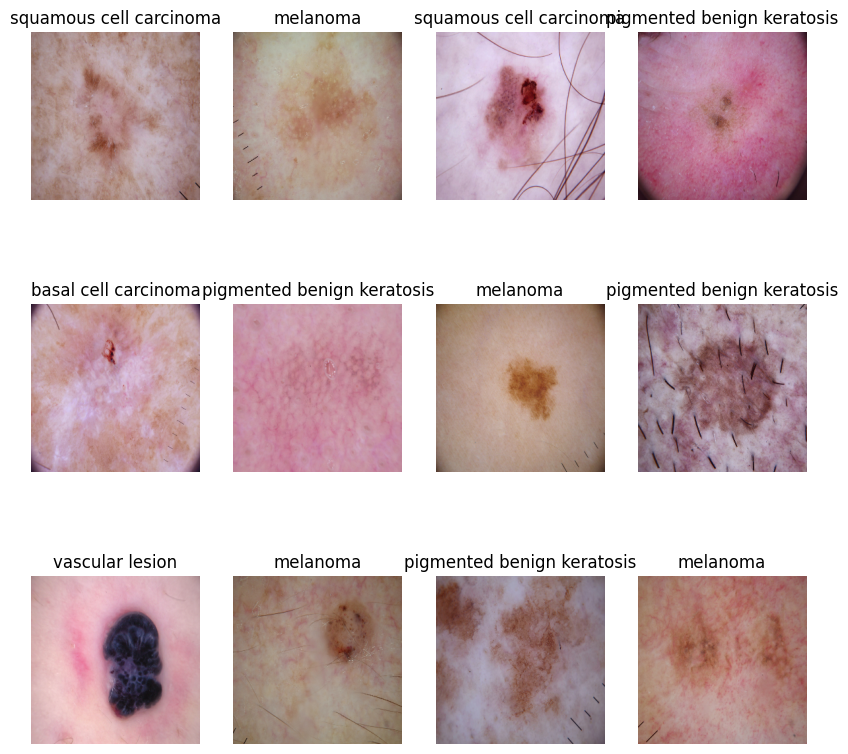

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
len(dataset)

74

In [ ]:
train_size = 0.8
len(dataset)*train_size

59.2

In [ ]:
train_ds = dataset.take(56)
len(train_ds)

56

In [ ]:
test_ds = dataset.skip(56)
len(test_ds)

18

In [ ]:
val_size=0.1
len(dataset)*val_size

7.4

In [ ]:
val_ds = test_ds.take(7)
len(val_ds)

7

In [ ]:
test_ds = test_ds.skip(3)
len(test_ds)

15

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

59

In [ ]:
len(val_ds)

7

In [ ]:
len(test_ds)

8

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25
)

Epoch 1/25
59/59 [==============================] - 837s 4s/step - loss: 2.0574 - accuracy: 0.2312 - val_loss: 2.0779 - val_accuracy: 0.2232
Epoch 2/25
59/59 [==============================] - 217s 4s/step - loss: 1.8949 - accuracy: 0.2999 - val_loss: 1.8434 - val_accuracy: 0.3571
Epoch 3/25
59/59 [==============================] - 211s 4s/step - loss: 1.6559 - accuracy: 0.4054 - val_loss: 1.6242 - val_accuracy: 0.4643
Epoch 4/25
59/59 [==============================] - 216s 4s/step - loss: 1.5383 - accuracy: 0.4614 - val_loss: 1.5750 - val_accuracy: 0.4420
Epoch 5/25
59/59 [==============================] - 219s 4s/step - loss: 1.5186 - accuracy: 0.4699 - val_loss: 1.5005 - val_accuracy: 0.4955
Epoch 6/25
59/59 [==============================] - 214s 4s/step - loss: 1.4358 - accuracy: 0.5024 - val_loss: 1.5006 - val_accuracy: 0.4955
Epoch 7/25
59/59 [==============================] - 221s 4s/step - loss: 1.4574 - accuracy: 0.4928 - val_loss: 1.4198 - val_accuracy: 0.5446
Epoch 8/25
59

In [29]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 72s 811ms/step - loss: 1.0783 - accuracy: 0.5938


In [30]:
# Scores is a list containing loss and accuracy value
scores

[1.0782674551010132, 0.59375]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 59}

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
history.history['loss'][:5] # show loss for first 5 epochs

[2.0573885440826416,
 1.8949024677276611,
 1.6559497117996216,
 1.5383477210998535,
 1.5186402797698975]

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

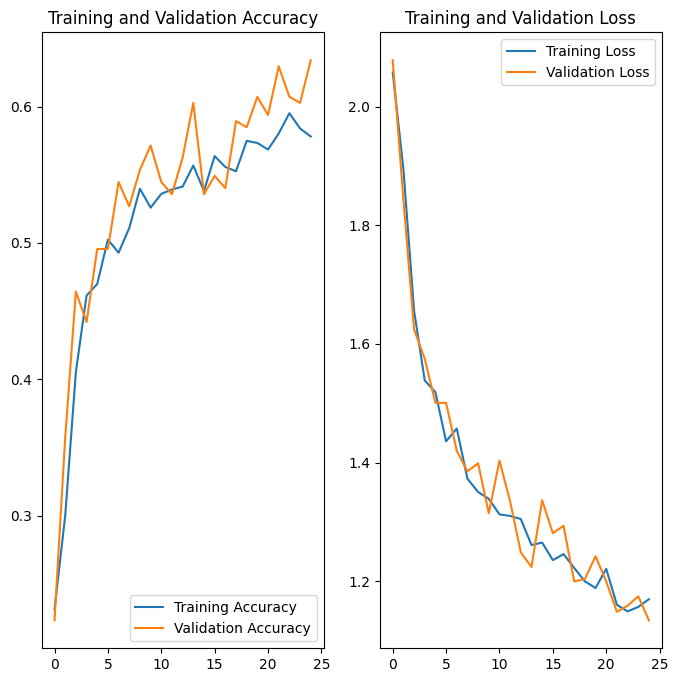

In [38]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(25), acc, label='Training Accuracy')
plt.plot(range(25), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(25), loss, label='Training Loss')
plt.plot(range(25), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: melanoma
1/1 [==============================] - 1s 1s/step
predicted label: melanoma


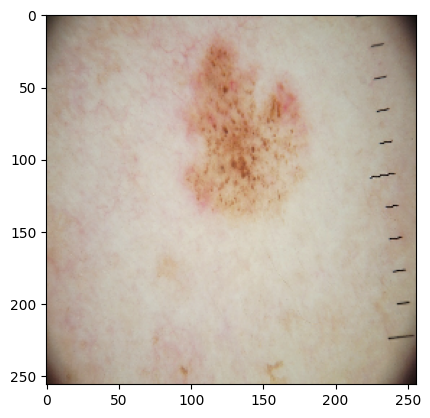

In [39]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [40]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 48ms/step


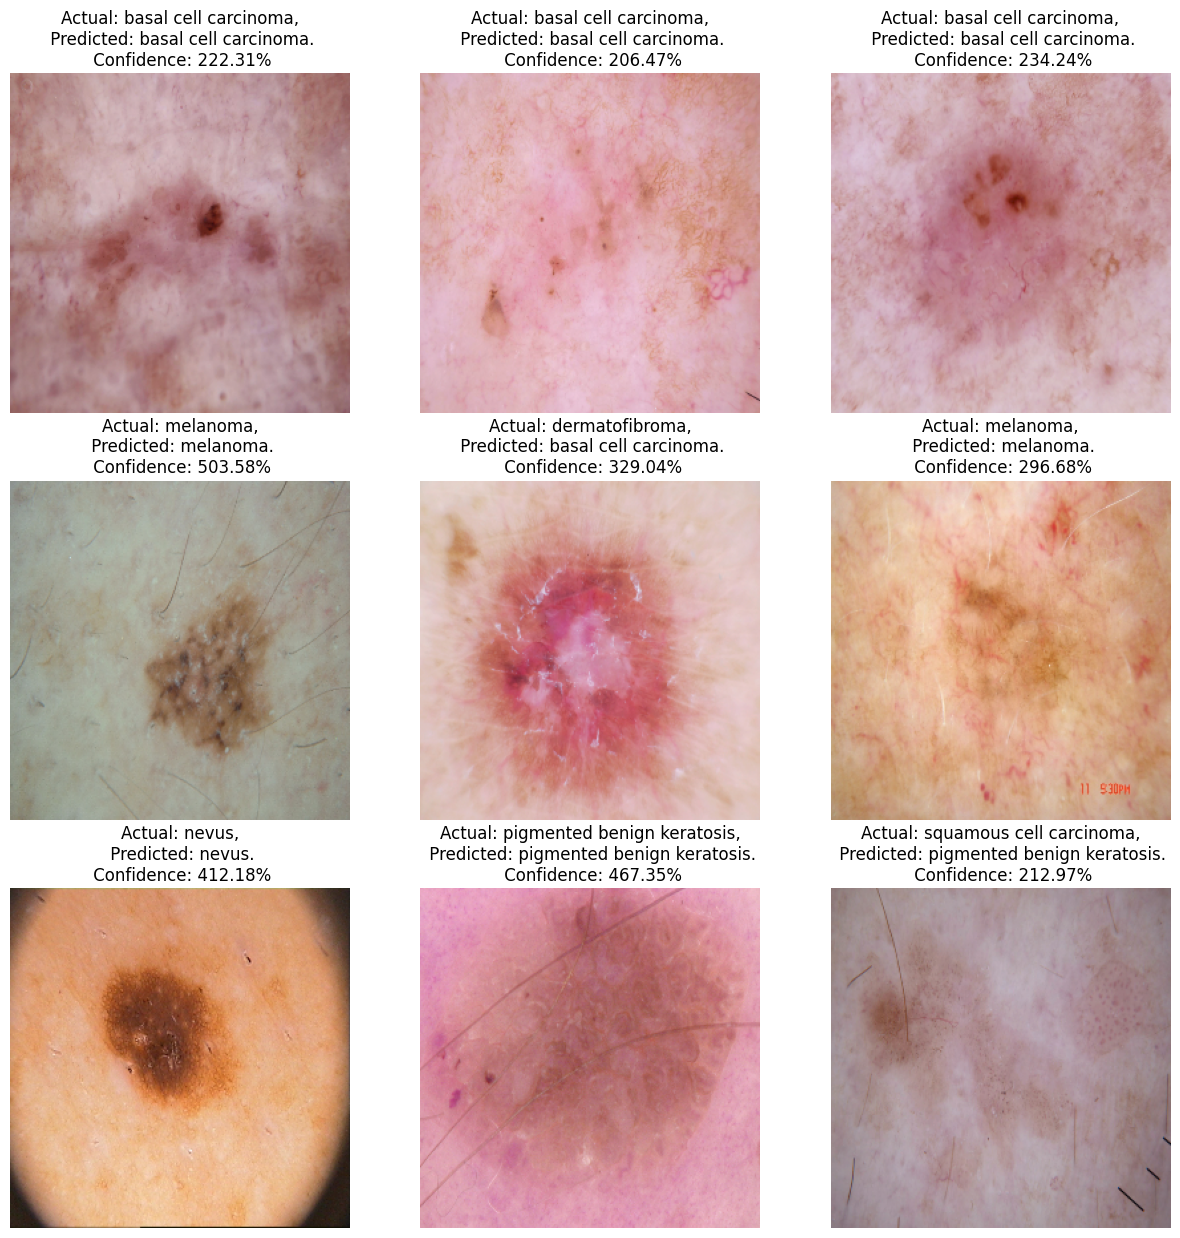

In [41]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [42]:
tf.saved_model.save(model, 'path/to/saved_model')

In [43]:
converter = tf.lite.TFLiteConverter.from_saved_model('path/to/saved_model')
tflite_model = converter.convert()

In [44]:
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)